<a href="https://colab.research.google.com/github/KarenLira25/Proyecto-Redes-Neuronales/blob/main/Proyecto_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Silvia Karen Retama Lira

##1. Entrena una red neuronal para que reproduzca la siguientes funciones
 en el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la
gráfica de la función.
*   $3 sin(πx)$
*   $1 + 2x + 4x^3$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import asarray
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

### $3 sin(πx)$

In [ ]:
# Conjunto de datos
x = np.arange(-1, 1, 0.001)
y = asarray([3*np.sin(math.pi*i) for i in x])     #convertir la estructura de los datos en un array Numpy
print(x.min(), x.max(), y.min(), y.max())

#transformar los arreglos
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

#escalar las variables de entrada y las variables de salida
esc_x = MinMaxScaler()
x = esc_x.fit_transform(x)
esc_y = MinMaxScaler() 
y = esc_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

-1.0 0.9990000000000019 -3.0 3.0
0.0 0.9999999999999999 0.0 1.0


Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.0902
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 11/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 12/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 13/50
100/100 [====

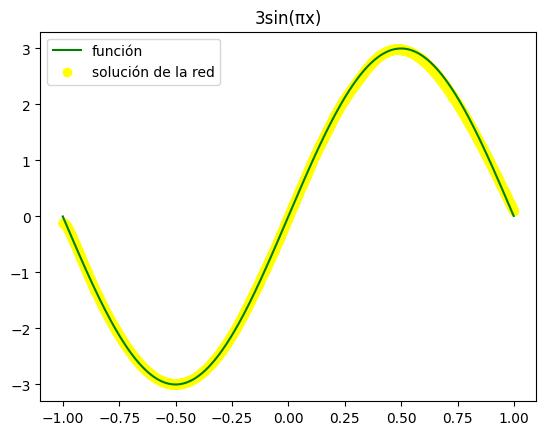

In [ ]:
#diseño del modelo de la red neuronal
modelo = Sequential()
modelo.add(Dense(512, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dense(512, activation='sigmoid', kernel_initializer='he_uniform'))
modelo.add(Dense(1))


modelo.compile(loss= 'mse', optimizer='adam')               #función de pérdida y algoritmo de optimización
modelo.fit(x, y, epochs=50, batch_size=20, verbose=1)       #modelo con los datos de entrenamiento
y1 = modelo.predict(x)                                      #predicciones para los datos de entrada

# transformadas inversas
x_0 = esc_x.inverse_transform(x)
y_0 = esc_y.inverse_transform(y)
y1_0 = esc_y.inverse_transform(y1)

#gráfica
plt.plot(x_0, y_0, color='green', label='función')
plt.scatter(x_0, y1_0, color='yellow', label='solución de la red')
plt.title('3sin(πx)')
plt.legend()
plt.show()

### $1+2x+4x^3$

In [ ]:
# Conjunto de datos
x = np.arange(-1, 1, 0.001)
y = asarray([1+2*i+4*i**3 for i in x])     #convertir la estructura de los datos en un array Numpy
print(x.min(), x.max(), y.min(), y.max())

#transformar los arreglos
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

#escalar las variables de entrada y las variables de salida
esc_x = MinMaxScaler()
x = esc_x.fit_transform(x)
esc_y = MinMaxScaler() 
y = esc_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

-1.0 0.9990000000000019 -5.0 6.986011996000027
0.0 0.9999999999999999 0.0 1.0


Epoch 1/28
100/100 [==============================] - 1s 3ms/step - loss: 0.1036
Epoch 2/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 3/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 4/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 5/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 8/28
100/100 [==============================] - 0s 3ms/step - loss: 6.0587e-04
Epoch 9/28
100/100 [==============================] - 0s 3ms/step - loss: 5.1149e-04
Epoch 10/28
100/100 [==============================] - 0s 3ms/step - loss: 5.5414e-04
Epoch 11/28
100/100 [==============================] - 0s 3ms/step - loss: 5.2239e-04
Epoch 12/28
100/100 [==============================] - 0s 3ms/step - loss: 4.4919e-04
Epoch

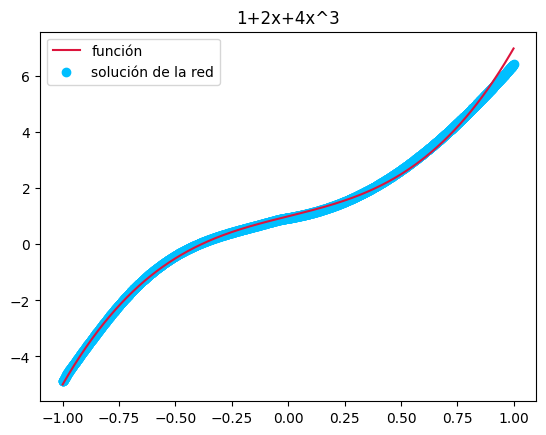

In [ ]:
#diseño del modelo de la red neuronal
modelo = Sequential()
modelo.add(Dense(512, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dense(512, activation='sigmoid', kernel_initializer='he_uniform'))
modelo.add(Dense(1))


modelo.compile(loss= 'mse', optimizer='adam')               #función de pérdida y algoritmo de optimización
modelo.fit(x, y, epochs=28, batch_size=20, verbose=1)       #modelo con los datos de entrenamiento
y1 = modelo.predict(x)                                      #predicciones para los datos de entrada

# transformadas inversas
x_0 = esc_x.inverse_transform(x)
y_0 = esc_y.inverse_transform(y)
y1_0 = esc_y.inverse_transform(y1)

#gráfica
plt.plot(x_0, y_0, color='crimson', label='función')
plt.scatter(x_0, y1_0, color='deepskyblue', label='solución de la red')
plt.title('1+2x+4x^3')
plt.legend()
plt.show()

##2. Elegir un problema de los siguientes

*  Detectar fraudes en movimientos de tarjetas bancarias: https://www.kaggle.com/mlg-ulb/creditcardfraud
*  Identificar enfermedades en plantas: https://www.kaggle.com/competitions/plant-pathology-2021-fgvc8/data

y diseñnar y entrenar una red neuronal con keras.

###Problema: Detectar fraudes en movimientos de tarjetas bancarias

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones.

Las columnas V1, V2, …, V28 son los principales componentes obtenidos con PCA, las únicas columnas que no han sido transformadas con PCA son 'Time' y 'Amount'. La columna 'Time' tiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La columna 'Amount' es la cantidad de la transacción.

In [19]:
import pandas as pd

In [20]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Cargar los datos
file_name = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_name) 
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [24]:
#Se dividen los datos en datos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class', 'Time'], axis=1), df['Class'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [25]:
#Parámetros para la red
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
auc = tf.keras.metrics.AUC(name='auc')


In [26]:
#red neuronal
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])


modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, auc])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [27]:
#Entrenar al modelo
history = modelo.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    callbacks=[callback]
                   )


Epoch 1/20
668/668 [==============================] - 6s 7ms/step - loss: 0.0454 - accuracy: 0.9983 - precision: 0.5599 - recall: 0.5032 - auc: 0.8144 - val_loss: 0.0085 - val_accuracy: 0.9994 - val_precision: 0.8548 - val_recall: 0.6795 - val_auc: 0.8896
Epoch 2/20
668/668 [==============================] - 5s 7ms/step - loss: 0.0179 - accuracy: 0.9989 - precision: 0.7677 - recall: 0.6171 - auc: 0.8850 - val_loss: 0.0060 - val_accuracy: 0.9994 - val_precision: 0.8438 - val_recall: 0.6923 - val_auc: 0.9012
Epoch 3/20
668/668 [==============================] - 5s 7ms/step - loss: 0.0105 - accuracy: 0.9991 - precision: 0.7862 - recall: 0.6867 - auc: 0.9025 - val_loss: 0.0039 - val_accuracy: 0.9995 - val_precision: 0.8571 - val_recall: 0.7692 - val_auc: 0.9271
Epoch 4/20
668/668 [==============================] - 4s 7ms/step - loss: 0.0067 - accuracy: 0.9992 - precision: 0.7979 - recall: 0.7247 - auc: 0.9178 - val_loss: 0.0036 - val_accuracy: 0.9995 - val_precision: 0.8611 - val_recall: 0